# Hypothesis generation:


*   Problem Statement:

build a predictive model and find out the sales of each product at a particular store




*   Stating the Hypothesis:

The outlet sales depend on the outlet size, outlet location type and product type.
*   Alternate hypotheis:

The outlet sales do not depend on the outlet size, outlet location type nor product type.



In [1]:
!gdown 11DHgZkrDKSpnma6Qp_6CBMom-C0zkd2U

Downloading...
From: https://drive.google.com/uc?id=11DHgZkrDKSpnma6Qp_6CBMom-C0zkd2U
To: /content/Train.csv
100% 870k/870k [00:00<00:00, 102MB/s]


#Loading Data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd

ptrain = '/content/drive/MyDrive/9961_14084_bundle_archive/Train.csv'
data = pd.read_csv(ptrain)
print(data.shape)
data.head(5)

(8523, 12)


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


# Handling missing values:

In [4]:
MVC = data.isnull().sum()
MVC

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [5]:
updated_data = data
updated_data['Item_Weight']=updated_data['Item_Weight'].fillna(updated_data['Item_Weight'].mean())
updated_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [6]:
MVC = updated_data.isnull().sum()
MVC

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [7]:
final_data = updated_data
print(final_data['Outlet_Size'].mode())

0    Medium
dtype: object


In [8]:
final_data['Outlet_Size']=final_data['Outlet_Size'].fillna('Medium')
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [9]:
MVC = final_data.isnull().sum()
MVC

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

# Exploratory data analysis:

In [10]:
final_data.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300000,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920000,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500000,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200000,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.930000,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395000,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650000,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,12.857645,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200000,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,Medium,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200000,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,Medium,Tier 2,Supermarket Type1,4710.5350


In [11]:
final_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [12]:
final_data.shape

(8523, 12)

In [13]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [14]:
duplicate= final_data.duplicated()
print(duplicate.sum())

0


# Dealing with outliers:

<function matplotlib.pyplot.show(close=None, block=None)>

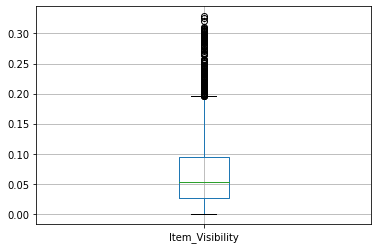

In [15]:
from pandas.plotting import boxplot
import matplotlib.pyplot as plt
final_data.boxplot(column=['Item_Visibility'])
plt.show

In [16]:
import numpy as np

def remove_outlier (col):
  sorted(col)
  Q1,Q3=col.quantile([0.25,0.75])
  IQR=Q3-Q1
  lower_range= Q1-(1.5 * IQR)
  upper_range= Q3+(1.5 * IQR)
  return lower_range,upper_range

lowincome,uppincome=remove_outlier(final_data['Item_Visibility'])
final_data['Item_Visibility']=np.where(final_data['Item_Visibility']>uppincome,uppincome,final_data['Item_Visibility'])
final_data['Item_Visibility']=np.where(final_data['Item_Visibility']<lowincome,lowincome,final_data['Item_Visibility'])


<function matplotlib.pyplot.show(close=None, block=None)>

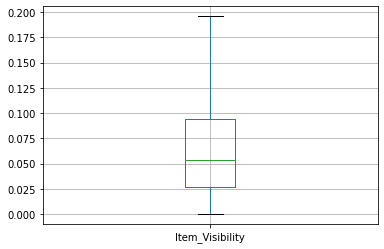

In [17]:
final_data.boxplot(column=['Item_Visibility'])
plt.show

In [18]:
final_data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

#Data Visualization:

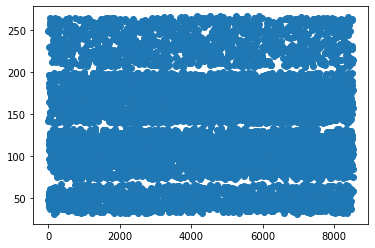

In [19]:
plt.scatter(final_data.index,final_data['Item_MRP'])
plt.show()

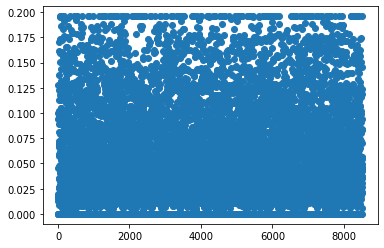

In [20]:
plt.scatter(final_data.index,final_data['Item_Visibility'])
plt.show()

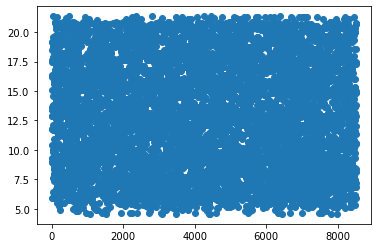

In [21]:
plt.scatter(final_data.index,final_data['Item_Weight'])
plt.show()

(array([5577.,    0.,    0.,  928.,    0.,    0., 1083.,    0.,    0.,
         935.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

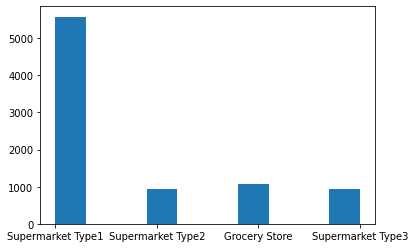

In [22]:
plt.hist(final_data['Outlet_Type'])

(array([5203.,    0.,    0.,    0.,    0.,  932.,    0.,    0.,    0.,
        2388.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

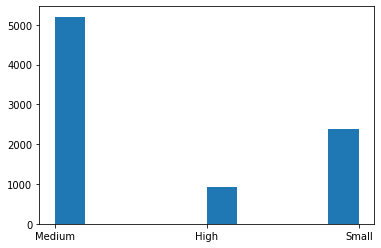

In [23]:
plt.hist(final_data['Outlet_Size'])

(array([2388.,    0.,    0.,    0.,    0., 3350.,    0.,    0.,    0.,
        2785.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

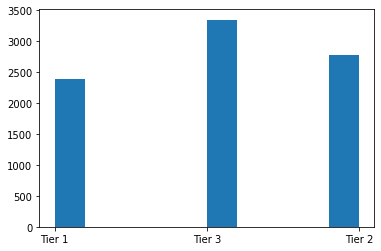

In [24]:
plt.hist(final_data['Outlet_Location_Type'])

(array([1127.,  425., 2142.,  648., 2056.,  110.,  734.,  649.,  399.,
         233.]),
 array([ 0. ,  1.5,  3. ,  4.5,  6. ,  7.5,  9. , 10.5, 12. , 13.5, 15. ]),
 <BarContainer object of 10 artists>)

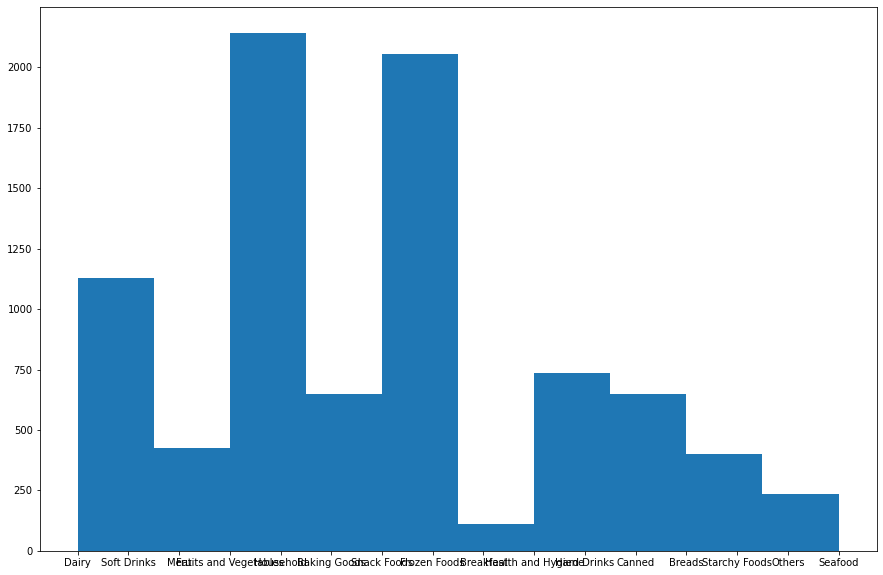

In [25]:
from matplotlib.figure import Figure
plt.figure(figsize=(15,10))
plt.hist(final_data['Item_Type'])

Text(0, 0.5, 'Item_Outlet_Sales')

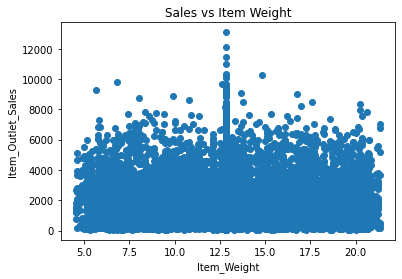

In [26]:
plt.scatter(final_data.Item_Weight, final_data.Item_Outlet_Sales)
plt.title('Sales vs Item Weight')
plt.xlabel('Item_Weight')
plt.ylabel('Item_Outlet_Sales')

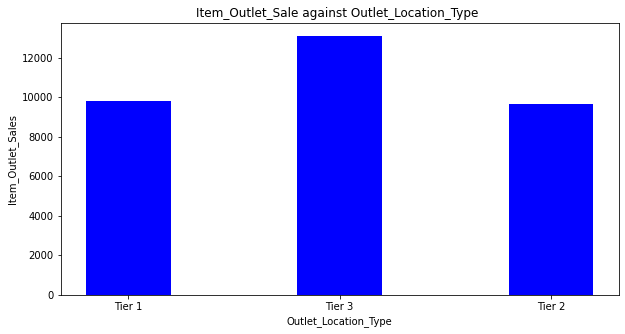

In [27]:
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(final_data['Outlet_Location_Type'], final_data['Item_Outlet_Sales'], color ='blue',
        width = 0.4)
 
plt.xlabel("Outlet_Location_Type")
plt.ylabel("Item_Outlet_Sales")
plt.title("Item_Outlet_Sale against Outlet_Location_Type ")
plt.show()

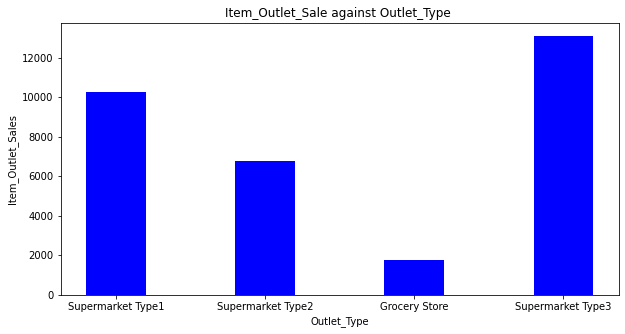

In [28]:
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(final_data['Outlet_Type'], final_data['Item_Outlet_Sales'], color ='blue',
        width = 0.4)
 
plt.xlabel("Outlet_Type")
plt.ylabel("Item_Outlet_Sales")
plt.title("Item_Outlet_Sale against Outlet_Type ")
plt.show()

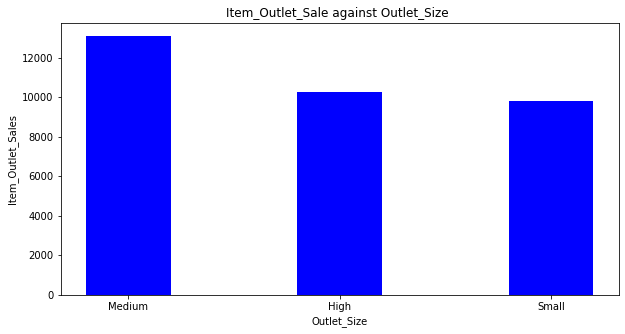

In [29]:
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(final_data['Outlet_Size'], final_data['Item_Outlet_Sales'], color ='blue',
        width = 0.4)
 
plt.xlabel("Outlet_Size")
plt.ylabel("Item_Outlet_Sales")
plt.title("Item_Outlet_Sale against Outlet_Size ")
plt.show()

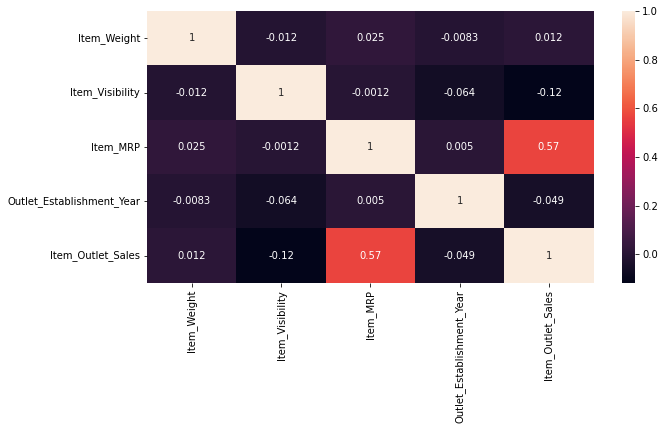

In [30]:
import seaborn as sns
plt.figure(figsize=(10,5)) 
sns.heatmap(final_data.corr(),annot = True)
plt.show()

# Encoding of categorical variables:

In [31]:
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
final_data['Outlet_Location_Type']= label_encoder.fit_transform(final_data['Outlet_Location_Type'])
final_data.head

<bound method NDFrame.head of      Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0              FDA15        9.300          Low Fat         0.016047   
1              DRC01        5.920          Regular         0.019278   
2              FDN15       17.500          Low Fat         0.016760   
3              FDX07       19.200          Regular         0.000000   
4              NCD19        8.930          Low Fat         0.000000   
...              ...          ...              ...              ...   
8518           FDF22        6.865          Low Fat         0.056783   
8519           FDS36        8.380          Regular         0.046982   
8520           NCJ29       10.600          Low Fat         0.035186   
8521           FDN46        7.210          Regular         0.145221   
8522           DRG01       14.800          Low Fat         0.044878   

                  Item_Type  Item_MRP Outlet_Identifier  \
0                     Dairy  249.8092            OUT049   

In [32]:
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
y= label_encoder.fit_transform(final_data['Outlet_Size'])
print(y)

[1 1 1 ... 2 1 2]


In [33]:
final_data.head

<bound method NDFrame.head of      Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0              FDA15        9.300          Low Fat         0.016047   
1              DRC01        5.920          Regular         0.019278   
2              FDN15       17.500          Low Fat         0.016760   
3              FDX07       19.200          Regular         0.000000   
4              NCD19        8.930          Low Fat         0.000000   
...              ...          ...              ...              ...   
8518           FDF22        6.865          Low Fat         0.056783   
8519           FDS36        8.380          Regular         0.046982   
8520           NCJ29       10.600          Low Fat         0.035186   
8521           FDN46        7.210          Regular         0.145221   
8522           DRG01       14.800          Low Fat         0.044878   

                  Item_Type  Item_MRP Outlet_Identifier  \
0                     Dairy  249.8092            OUT049   

In [34]:
final_data['Outlet_Size'] = [0 if each == "Small" else 1 if each == "Medium" else 2 for each in final_data['Outlet_Size']]

In [35]:
final_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.065307,140.992782,1997.831867,0.829168,1.112871,2181.288914
std,4.226124,0.048841,62.275067,8.371760,0.600327,0.812757,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,0.000000,0.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,0.000000,0.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1.000000,1.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,1.000000,2.000000,3101.296400
max,21.350000,0.195979,266.888400,2009.000000,2.000000,2.000000,13086.964800


In [36]:
final_data.head

<bound method NDFrame.head of      Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0              FDA15        9.300          Low Fat         0.016047   
1              DRC01        5.920          Regular         0.019278   
2              FDN15       17.500          Low Fat         0.016760   
3              FDX07       19.200          Regular         0.000000   
4              NCD19        8.930          Low Fat         0.000000   
...              ...          ...              ...              ...   
8518           FDF22        6.865          Low Fat         0.056783   
8519           FDS36        8.380          Regular         0.046982   
8520           NCJ29       10.600          Low Fat         0.035186   
8521           FDN46        7.210          Regular         0.145221   
8522           DRG01       14.800          Low Fat         0.044878   

                  Item_Type  Item_MRP Outlet_Identifier  \
0                     Dairy  249.8092            OUT049   

In [37]:
final_data['Item_Fat_Content'] = [1 if each == "Regular"  else 1 if each == "reg" else 0 for each in final_data['Item_Fat_Content']]

In [38]:
final_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,0,0.016047,Dairy,249.8092,OUT049,1999,1,0,Supermarket Type1,3735.1380
1,DRC01,5.92,1,0.019278,Soft Drinks,48.2692,OUT018,2009,1,2,Supermarket Type2,443.4228
2,FDN15,17.50,0,0.016760,Meat,141.6180,OUT049,1999,1,0,Supermarket Type1,2097.2700
3,FDX07,19.20,1,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,1,2,Grocery Store,732.3800
4,NCD19,8.93,0,0.000000,Household,53.8614,OUT013,1987,2,2,Supermarket Type1,994.7052


In [39]:
final_data.drop('Item_Identifier',axis=1)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,0,0.016047,Dairy,249.8092,OUT049,1999,1,0,Supermarket Type1,3735.1380
1,5.920,1,0.019278,Soft Drinks,48.2692,OUT018,2009,1,2,Supermarket Type2,443.4228
2,17.500,0,0.016760,Meat,141.6180,OUT049,1999,1,0,Supermarket Type1,2097.2700
3,19.200,1,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,1,2,Grocery Store,732.3800
4,8.930,0,0.000000,Household,53.8614,OUT013,1987,2,2,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0,0.056783,Snack Foods,214.5218,OUT013,1987,2,2,Supermarket Type1,2778.3834
8519,8.380,1,0.046982,Baking Goods,108.1570,OUT045,2002,1,1,Supermarket Type1,549.2850
8520,10.600,0,0.035186,Health and Hygiene,85.1224,OUT035,2004,0,1,Supermarket Type1,1193.1136
8521,7.210,1,0.145221,Snack Foods,103.1332,OUT018,2009,1,2,Supermarket Type2,1845.5976


In [40]:
y = pd.get_dummies(final_data.Outlet_Type)
print(y.head())

   Grocery Store  Supermarket Type1  Supermarket Type2  Supermarket Type3
0              0                  1                  0                  0
1              0                  0                  1                  0
2              0                  1                  0                  0
3              1                  0                  0                  0
4              0                  1                  0                  0


In [41]:
dummies_df = pd.DataFrame(y)


In [42]:
dummies_df.head()

,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,0,1,0,0
1,0,0,1,0
2,0,1,0,0
3,1,0,0,0
4,0,1,0,0


In [43]:
final_data.drop('Outlet_Type',axis=1)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales
0,FDA15,9.300,0,0.016047,Dairy,249.8092,OUT049,1999,1,0,3735.1380
1,DRC01,5.920,1,0.019278,Soft Drinks,48.2692,OUT018,2009,1,2,443.4228
2,FDN15,17.500,0,0.016760,Meat,141.6180,OUT049,1999,1,0,2097.2700
3,FDX07,19.200,1,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,1,2,732.3800
4,NCD19,8.930,0,0.000000,Household,53.8614,OUT013,1987,2,2,994.7052
...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,0,0.056783,Snack Foods,214.5218,OUT013,1987,2,2,2778.3834
8519,FDS36,8.380,1,0.046982,Baking Goods,108.1570,OUT045,2002,1,1,549.2850
8520,NCJ29,10.600,0,0.035186,Health and Hygiene,85.1224,OUT035,2004,0,1,1193.1136
8521,FDN46,7.210,1,0.145221,Snack Foods,103.1332,OUT018,2009,1,2,1845.5976


In [44]:
final_data=pd.concat([final_data, dummies_df],axis=1)


In [45]:
y = pd.get_dummies(final_data.Item_Type)
print(y.head())

   Baking Goods  Breads  Breakfast  Canned  Dairy  Frozen Foods  \
0             0       0          0       0      1             0   
1             0       0          0       0      0             0   
2             0       0          0       0      0             0   
3             0       0          0       0      0             0   
4             0       0          0       0      0             0   

   Fruits and Vegetables  Hard Drinks  Health and Hygiene  Household  Meat  \
0                      0            0                   0          0     0   
1                      0            0                   0          0     0   
2                      0            0                   0          0     1   
3                      1            0                   0          0     0   
4                      0            0                   0          1     0   

   Others  Seafood  Snack Foods  Soft Drinks  Starchy Foods  
0       0        0            0            0              0  
1   

In [46]:
dummies_df = pd.DataFrame(y)
final_data=pd.concat([final_data, dummies_df],axis=1)

In [47]:
final_data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,...,Fruits and Vegetables,Hard Drinks,Health and Hygiene,Household,Meat,Others,Seafood,Snack Foods,Soft Drinks,Starchy Foods
0,FDA15,9.300,0,0.016047,Dairy,249.8092,OUT049,1999,1,0,...,0,0,0,0,0,0,0,0,0,0
1,DRC01,5.920,1,0.019278,Soft Drinks,48.2692,OUT018,2009,1,2,...,0,0,0,0,0,0,0,0,1,0
2,FDN15,17.500,0,0.016760,Meat,141.6180,OUT049,1999,1,0,...,0,0,0,0,1,0,0,0,0,0
3,FDX07,19.200,1,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,1,2,...,1,0,0,0,0,0,0,0,0,0
4,NCD19,8.930,0,0.000000,Household,53.8614,OUT013,1987,2,2,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,0,0.056783,Snack Foods,214.5218,OUT013,1987,2,2,...,0,0,0,0,0,0,0,1,0,0
8519,FDS36,8.380,1,0.046982,Baking Goods,108.1570,OUT045,2002,1,1,...,0,0,0,0,0,0,0,0,0,0
8520,NCJ29,10.600,0,0.035186,Health and Hygiene,85.1224,OUT035,2004,0,1,...,0,0,1,0,0,0,0,0,0,0
8521,FDN46,7.210,1,0.145221,Snack Foods,103.1332,OUT018,2009,1,2,...,0,0,0,0,0,0,0,1,0,0


In [48]:
final_data=final_data.drop('Item_Type',axis=1)

In [49]:
final_data=final_data.drop('Outlet_Type',axis=1)

In [50]:
final_data=final_data.drop('Outlet_Identifier',axis=1)

In [51]:
final_data=final_data.drop('Item_Identifier',axis=1)

In [52]:
final_data

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Grocery Store,Supermarket Type1,...,Fruits and Vegetables,Hard Drinks,Health and Hygiene,Household,Meat,Others,Seafood,Snack Foods,Soft Drinks,Starchy Foods
0,9.300,0,0.016047,249.8092,1999,1,0,3735.1380,0,1,...,0,0,0,0,0,0,0,0,0,0
1,5.920,1,0.019278,48.2692,2009,1,2,443.4228,0,0,...,0,0,0,0,0,0,0,0,1,0
2,17.500,0,0.016760,141.6180,1999,1,0,2097.2700,0,1,...,0,0,0,0,1,0,0,0,0,0
3,19.200,1,0.000000,182.0950,1998,1,2,732.3800,1,0,...,1,0,0,0,0,0,0,0,0,0
4,8.930,0,0.000000,53.8614,1987,2,2,994.7052,0,1,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0,0.056783,214.5218,1987,2,2,2778.3834,0,1,...,0,0,0,0,0,0,0,1,0,0
8519,8.380,1,0.046982,108.1570,2002,1,1,549.2850,0,1,...,0,0,0,0,0,0,0,0,0,0
8520,10.600,0,0.035186,85.1224,2004,0,1,1193.1136,0,1,...,0,0,1,0,0,0,0,0,0,0
8521,7.210,1,0.145221,103.1332,2009,1,2,1845.5976,0,0,...,0,0,0,0,0,0,0,1,0,0


In [53]:
pip install movecolumn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for movecolumn: filename=movecolumn-0.0.7-py3-none-any.whl size=10439 sha256=66811ea65932f3bcfa41dd95d71defcac99e2a5b0296c46640fae41bfb85e47b
  Stored in directory: /root/.cache/pip/wheels/87/c0/a3/c969b717a383ab3ab158389e86e2ac7d44f6cf3b9fcb24301b
Successfully built movecolumn


In [54]:
import movecolumn as mc
mc.MoveToLast(final_data,'Item_Outlet_Sales')

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Grocery Store,Supermarket Type1,Supermarket Type2,...,Hard Drinks,Health and Hygiene,Household,Meat,Others,Seafood,Snack Foods,Soft Drinks,Starchy Foods,Item_Outlet_Sales
0,9.300,0,0.016047,249.8092,1999,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,3735.1380
1,5.920,1,0.019278,48.2692,2009,1,2,0,0,1,...,0,0,0,0,0,0,0,1,0,443.4228
2,17.500,0,0.016760,141.6180,1999,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,2097.2700
3,19.200,1,0.000000,182.0950,1998,1,2,1,0,0,...,0,0,0,0,0,0,0,0,0,732.3800
4,8.930,0,0.000000,53.8614,1987,2,2,0,1,0,...,0,0,1,0,0,0,0,0,0,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0,0.056783,214.5218,1987,2,2,0,1,0,...,0,0,0,0,0,0,1,0,0,2778.3834
8519,8.380,1,0.046982,108.1570,2002,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,549.2850
8520,10.600,0,0.035186,85.1224,2004,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,1193.1136
8521,7.210,1,0.145221,103.1332,2009,1,2,0,0,1,...,0,0,0,0,0,0,1,0,0,1845.5976


In [55]:
X= final_data.drop('Item_Outlet_Sales',axis=1)
Y= final_data['Item_Outlet_Sales']

In [56]:
X.describe()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Grocery Store,Supermarket Type1,Supermarket Type2,...,Fruits and Vegetables,Hard Drinks,Health and Hygiene,Household,Meat,Others,Seafood,Snack Foods,Soft Drinks,Starchy Foods
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,...,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.352693,0.065307,140.992782,1997.831867,0.829168,1.112871,0.127068,0.654347,0.108882,...,0.144550,0.025109,0.061011,0.106770,0.049865,0.019829,0.007509,0.140795,0.052212,0.017365
std,4.226124,0.477836,0.048841,62.275067,8.371760,0.600327,0.812757,0.333069,0.475609,0.311509,...,0.351667,0.156464,0.239365,0.308839,0.217679,0.139420,0.086334,0.347831,0.222467,0.130634
min,4.555000,0.000000,0.000000,31.290000,1985.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.310000,0.000000,0.026989,93.826500,1987.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,12.857645,0.000000,0.053931,143.012800,1999.000000,1.000000,1.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,16.000000,1.000000,0.094585,185.643700,2004.000000,1.000000,2.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,21.350000,1.000000,0.195979,266.888400,2009.000000,2.000000,2.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Splitting the data into test and train data:

In [57]:
from sklearn.model_selection import train_test_split
X_train,X_test, Y_train, Y_test= train_test_split(X,Y,random_state= 101,test_size=0.2)

In [58]:
X_test

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Grocery Store,Supermarket Type1,Supermarket Type2,...,Fruits and Vegetables,Hard Drinks,Health and Hygiene,Household,Meat,Others,Seafood,Snack Foods,Soft Drinks,Starchy Foods
8179,11.00,0,0.055163,100.3358,2009,1,2,0,0,1,...,0,0,1,0,0,0,0,0,0,0
8355,18.00,0,0.038979,148.6418,1987,2,2,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3411,7.72,1,0.074731,77.5986,1997,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
7089,20.70,0,0.049035,39.9506,2007,1,1,0,1,0,...,1,0,0,0,0,0,0,0,0,0
6954,7.55,0,0.027225,152.9340,2002,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1317,16.75,0,0.105019,155.2630,1999,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4996,8.52,0,0.027059,153.3682,1997,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
531,15.60,0,0.111686,184.7924,1998,1,2,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3891,17.10,0,0.000000,114.6860,2009,1,2,0,0,1,...,0,0,0,1,0,0,0,0,0,0


In [59]:
X_train

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Grocery Store,Supermarket Type1,Supermarket Type2,...,Fruits and Vegetables,Hard Drinks,Health and Hygiene,Household,Meat,Others,Seafood,Snack Foods,Soft Drinks,Starchy Foods
3684,19.250,0,0.101689,54.6956,1987,2,2,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1935,7.630,0,0.061410,94.6436,2007,1,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
5142,19.350,1,0.065891,167.0816,2007,1,1,0,1,0,...,0,0,0,0,1,0,0,0,0,0
4978,6.380,0,0.031898,177.4344,1997,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2299,16.700,0,0.022110,110.8886,2002,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599,5.000,0,0.044005,188.8530,1997,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
5695,14.650,0,0.170664,56.4614,2002,1,1,0,1,0,...,0,1,0,0,0,0,0,0,0,0
8006,12.500,0,0.018849,96.7384,1997,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
1361,9.695,1,0.129009,226.9404,2007,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [60]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
X_train_std= sc.fit_transform(X_train)
X_test_std= sc.transform(X_test)

# Building the models:

Linear Regression:

In [76]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(X_train_std,Y_train)

LinearRegression()

In [77]:
Y_pred_LR=LR.predict(X_test_std)
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
r2_score(Y_test,Y_pred_LR)


0.5569386802474026

In [63]:
mean_absolute_error(Y_test,Y_pred_LR)

825.4361750230311

In [66]:
np.sqrt(mean_squared_error(Y_test,Y_pred_LR))

1098.86473161018

Regularized Linear Regression:

In [67]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [68]:
alpha = 0.5  
model = Ridge(alpha=alpha)
model.fit(X_train, Y_train)

Ridge(alpha=0.5)

In [70]:
y_pred = model.predict(X_test)
MSE = mean_squared_error(Y_test, y_pred)
print('Mean square error = ', MSE)

Mean square error =  1207500.8107981991


Random Forest:

In [71]:
from sklearn.ensemble import RandomForestRegressor
RF=RandomForestRegressor()
RF.fit(X_train,Y_train)
Y_pred_RF=RF.predict(X_test)
r2_score(Y_test,Y_pred_RF)

0.5453904901815467

In [72]:
mean_absolute_error(Y_test,Y_pred_RF)
np.sqrt(mean_squared_error(Y_test,Y_pred_RF))

1113.0933152209202

XgBoost:

In [73]:
from xgboost import XGBRegressor
model = XGBRegressor()
model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [82]:
y_pred = model.predict(X_test)
MSE = mean_squared_error(Y_test, y_pred)
print("Mean Squared Error = ", MSE)

Mean Squared Error =  1266064.4940754678
